## Predicting Heart Disease Using Classification

### Introduction

Among the leading causes of death in many developed nations, coronary heart disease has been researched extensively in attempts to reduce its morbidity and enhance the quality of life of its victims (Henderson, 1996). Heart disease is caused by an accumulation of plaque in the arteries, which are the vessels that supply blood to the heart. As a result of this excessive plaque buildup, victims of coronary heart disease experience severe chest pain, cardiac arrests, and heart failures, all of which are fatal if left untreated (“Centers for Disease Control and Prevention”, n.d). A longitudinal study by Azuine et al. (1969-2013) on socioeconomic disparities and cardiovascular disease mortality found that individuals with lower education and incomes statuses experienced a 46-76% elevated risk of death from cardiovascular disease compared to their more privileged counterparts. Considering the disproportionate effects of this illness on individuals with less socioeconomic privilege, as well as its general mortality rate, it is essential that research on coronary heart disease continues to be prioritized. Using a 1988 public health data set containing databases from Cleveland, Hungary, Switzerland, and Long Beach, a data analysis will be conducted to answer the following question: can we create a classification model to predict heart disease in patients from this data set, and with what degree of accuracy can our model predict outcomes? The dataset was found via the website “Kaggle.com”, and will be used throughout the remainder of this analysis. This data set contains information about patients diagnosed with heart disease and its predictors, such as blood pressure, heart rate, cholesterol levels, sex, and more. 

### Methods & Results

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
# Source: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci
heart_data <- read_csv("https://raw.githubusercontent.com/zjz02/DSCI-100-Group_41/main/heart_cleveland_upload.csv")

head(heart_data)

Rows: 297 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
64,1,0,170,227,0,2,155,0,0.6,1,0,2,0


In [3]:
clean_data <- heart_data |>
           select(age, sex, cp, trestbps, chol, restecg, thalach, exang, condition) |>
           mutate(condition = as_factor(condition))

In [4]:
set.seed(41)

hd_split <- initial_split(clean_data, prop = 0.75, strata = condition)
hd_training <- training(hd_split)
hd_testing <- testing(hd_split)

After downloading and wrangling our data, we split our dataset into a testing and training set, with 75% of the data being allotted to the training set to train our KNN classification model, and the remaining 25% being allotted to the testing set for evaluation purposes. 

The varibles in our data set are:
- age: age in years
- sex: 1 = male; 0 = female
- cp: chest pain type (0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3 = asymptomatic)
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- restecg: resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- condition: 0 = no disease, 1 = disease

In [5]:
nrow(hd_training)

[1] 222

There are a total of 222 observations in the dataset.

In [6]:
summary(hd_training)

      age             sex               cp          trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.00   Min.   :100.0  
 1st Qu.:49.00   1st Qu.:0.0000   1st Qu.:1.25   1st Qu.:120.0  
 Median :56.00   Median :1.0000   Median :2.00   Median :130.0  
 Mean   :54.86   Mean   :0.6622   Mean   :2.14   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:3.00   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.00   Max.   :180.0  
      chol          restecg         thalach          exang        condition
 Min.   :126.0   Min.   :0.000   Min.   : 71.0   Min.   :0.0000   0:120    
 1st Qu.:211.0   1st Qu.:0.000   1st Qu.:132.2   1st Qu.:0.0000   1:102    
 Median :241.5   Median :2.000   Median :151.0   Median :0.0000            
 Mean   :246.5   Mean   :1.023   Mean   :148.2   Mean   :0.3468            
 3rd Qu.:275.0   3rd Qu.:2.000   3rd Qu.:163.0   3rd Qu.:1.0000            
 Max.   :564.0   Max.   :2.000   Max.   :202.0   Max.   :1.0000            

#### Visualization of Original Training Data

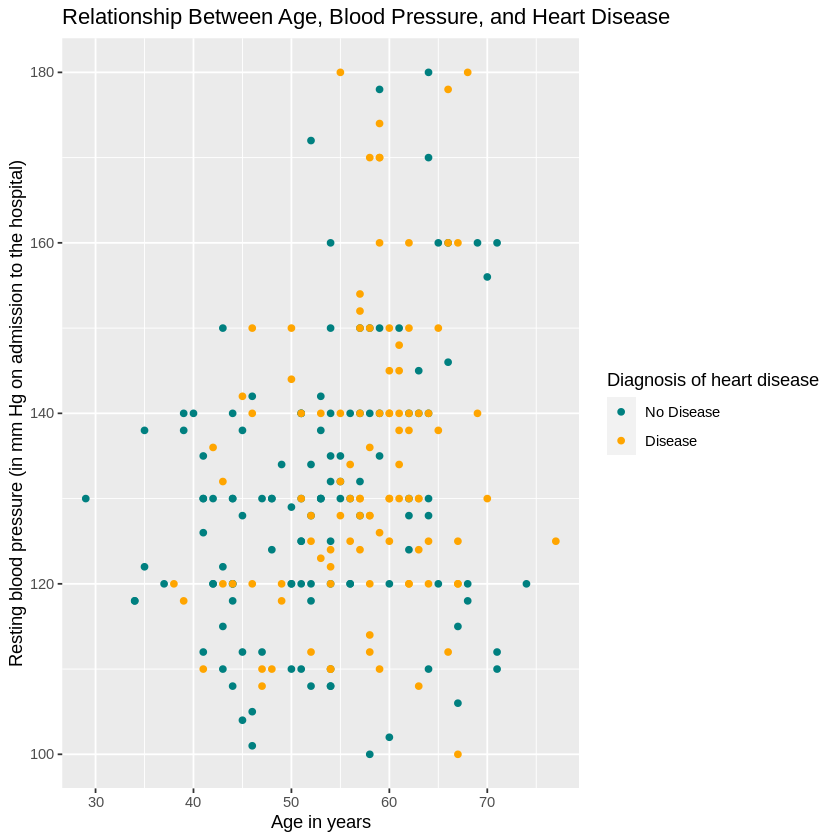

In [7]:
hd_rbp_plot <- ggplot(hd_training, aes(x = age, y = trestbps, group = condition, color = condition)) +
             geom_point() +
             labs(x = "Age in years", y = "Resting blood pressure (in mm Hg on admission to the hospital)", colour = "Diagnosis of heart disease") +
             scale_color_manual(labels = c("0" = "No Disease", "1" = "Disease"), values = c("#008080", "#FFA500")) +
             ggtitle("Relationship Between Age, Blood Pressure, and Heart Disease")
hd_rbp_plot

There is a positive correlation between higher blood pressure and heart disease, as well as advanced age with heart disease. This does not mean that these two variables have a causational relationship with each other, but rather that they vary together. 

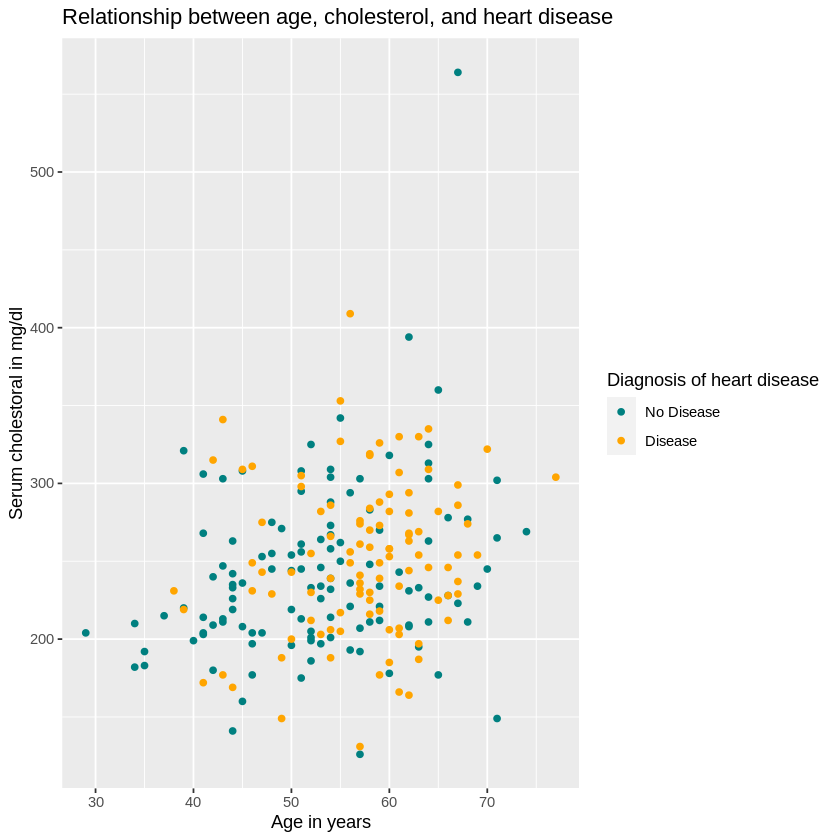

In [8]:
hd_chol_plot <- ggplot(hd_training, aes(x = age, y = chol, group = condition, color = condition)) +
             geom_point() +
             labs(x = "Age in years", y = "Serum cholestoral in mg/dl", colour = "Diagnosis of heart disease") +
             scale_color_manual(labels = c("0" = "No Disease", "1" = "Disease"), values = c("#008080", "#FFA500")) +
             ggtitle("Relationship between age, cholesterol, and heart disease")
hd_chol_plot

There is a positive correlation between cholesterol levels and heart disease diagnosis. 

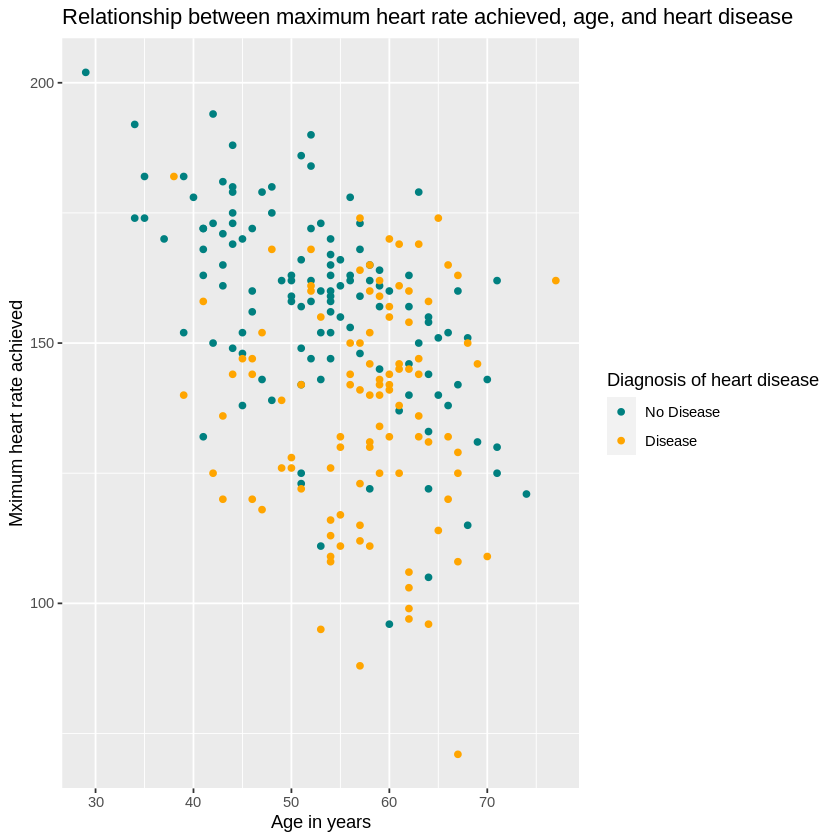

In [9]:
hd_mhra_plot <- ggplot(hd_training, aes(x = age, y = thalach, group = condition, color = condition)) +
             geom_point() +
             labs(x = "Age in years", y = "Mximum heart rate achieved", colour = "Diagnosis of heart disease") +
             scale_color_manual(labels = c("0" = "No Disease", "1" = "Disease"), values = c("#008080", "#FFA500")) +
             ggtitle("Relationship between maximum heart rate achieved, age, and heart disease")
hd_mhra_plot

There is a negative correlation between maximum heart rate and heart disease.

#### Training the model

In [10]:
set.seed(41)

hd_recipe <- recipe(condition ~ age + trestbps + chol + thalach, data = hd_training) |>
          step_scale(all_predictors()) |>
          step_center(all_predictors())

training_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
        set_engine("kknn") |>
        set_mode("classification")

vfold <- vfold_cv(hd_training, v = 5, strata = condition)

Here we have created a recipe specifying that we want the classifier to be “condition” and the predictors in our model to be age, resting blood pressure, cholesterol levels, and maximum heart rate achieved. We also made a model specification, tuning for a K value, which allows us to assess the accuracy estimates of different K to choose the optimal number. We created a cross validation data subset using our training data, with the goal of evaluating the accuracy of each of our K values across different folds of data. 

In [11]:
set.seed(41)

training_workflow_1 <- workflow() |>
                    add_recipe(hd_recipe) |>
                    add_model(training_spec) |>
                    tune_grid(resamples = vfold, grid = tibble(neighbors = seq(1, 101, 5))) |>
                    collect_metrics()

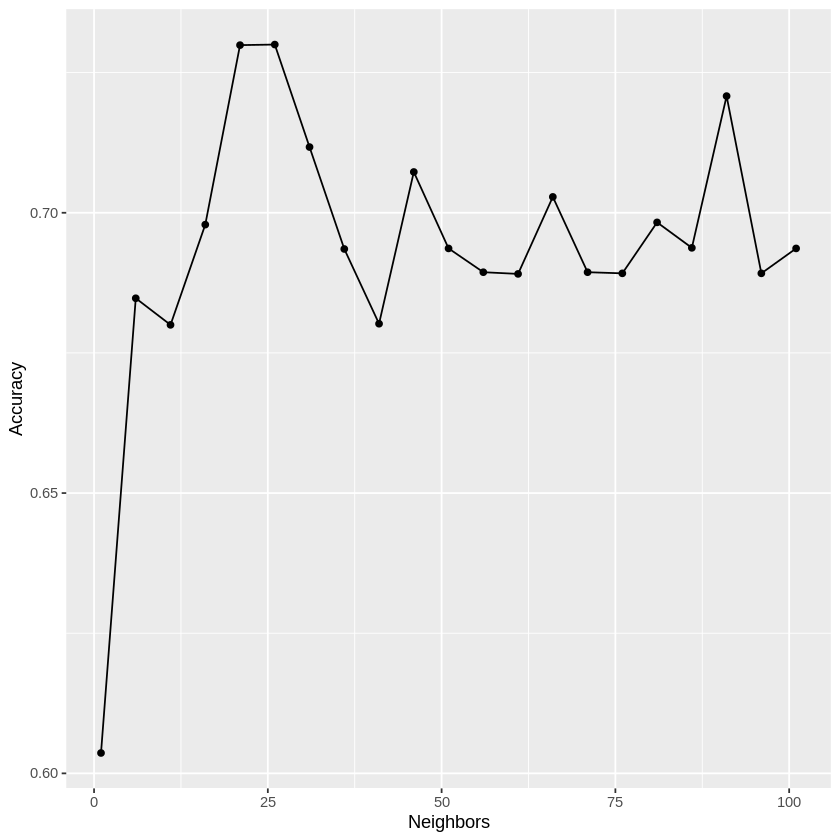

In [12]:
accuracy_plot_1 <- training_workflow_1 |>
              filter(.metric == "accuracy") |>
              ggplot(aes(x = neighbors, y = mean)) +
              geom_point() +
              geom_line() +
              labs(x = "Neighbors", y = "Accuracy")

accuracy_plot_1

In [13]:
k_1 <- training_workflow_1 |>
       filter(.metric == "accuracy") |>
       filter(mean == max(mean)) |>
       pull(neighbors)

k_1

[1] 26

We input our recipe and model specification into a workflow, and fit them to our cross validation data using K values that range from 1 to 101 increasing by 5. We collected the metrics from the 20 iterations our model performed, and plotted the accuracy vs K values below, and found the K value with the highest accuracy estimate in these iterations to be 26. 

In [14]:
set.seed(41)

training_workflow_2 <- workflow() |>
                    add_recipe(hd_recipe) |>
                    add_model(training_spec) |>
                    tune_grid(resamples = vfold, grid = tibble(neighbors = seq((k_1 - 10), (k_1 + 10), 1))) |>
                    collect_metrics()

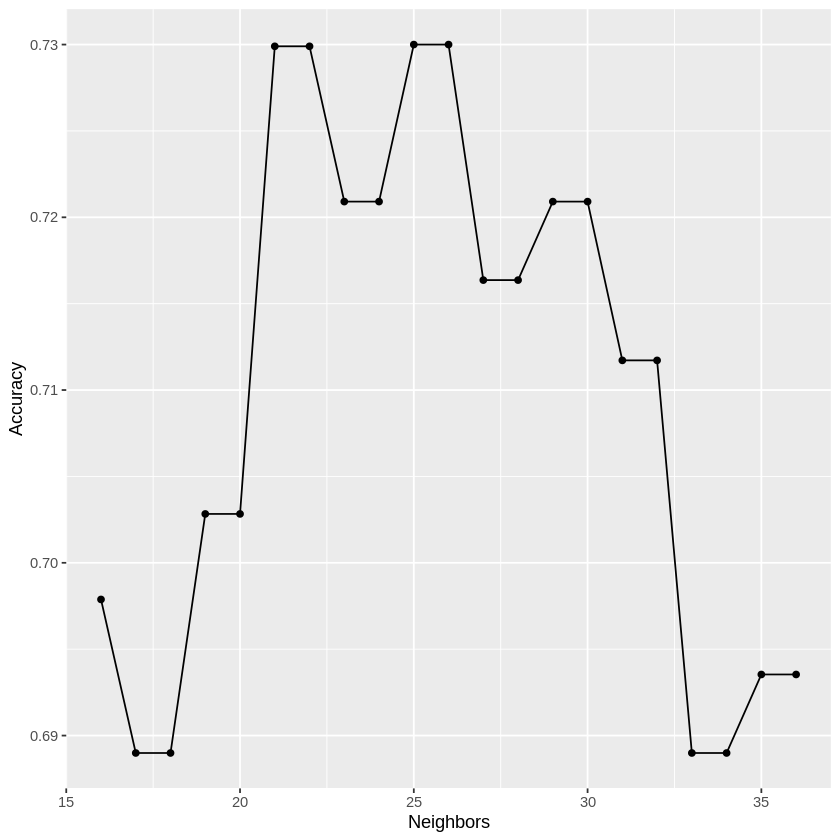

In [15]:
accuracy_plot_2 <- training_workflow_2 |>
                filter(.metric == "accuracy") |>
                ggplot(aes(x = neighbors, y = mean)) +
                geom_point() +
                geom_line() +
                labs(x = "Neighbors", y = "Accuracy")

accuracy_plot_2

In [16]:
k <- training_workflow_2 |>
       filter(.metric == "accuracy") |>
       filter(mean == max(mean)) |>
       pull(neighbors)

k

[1] 25 26

To get a better idea of our optimal K value, we created an adjusted K value range and fit it to our model again, this time zoomed in to K values between 16 and 36. We plotted this again, and found that both 25 and 26 are the optimal K values to use with our model.

In [17]:
set.seed(41)

hd_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 25) |>
           set_engine("kknn") |>
           set_mode("classification")

In [18]:
set.seed(41)

hd_fit <- workflow() |>
       add_recipe(hd_recipe) |>
       add_model(hd_spec) |>
       fit(data = hd_training)

After selecting the ideal K value, we created a new model specification with 25 neighbors, and fitted this to our training data.

#### Prediction and Result Analysis

In [19]:
set.seed(41)

hd_pred <- predict(hd_fit, hd_testing) |>
        bind_cols(hd_testing)

In [20]:
hd_metrics <- hd_pred |>
           metrics(truth = condition, estimate = .pred_class) |>
           filter(.metric == "accuracy") |>
           select(.estimate)

hd_metrics

.estimate
<dbl>
0.6666667


Finally, we made predictions about the classes of the data points in the testing set, using our model. We filtered for the accuracy of our predictions on the testing data, and found that our model was able to predict the classes of data points as either having or not having heart disease with an average accuracy of 66.67%. 

In [21]:
hd_conf_mat <- hd_pred |>
            conf_mat(truth = condition, estimate = .pred_class)

hd_conf_mat

          Truth
Prediction  0  1
         0 31 16
         1  9 19

We also created a confusion matrix to better visualize which data points were correctly and incorrectly predicted. 

#### Visualization of Prediction on Original Data

In [22]:
prediction <- predict(hd_fit, clean_data) |>
           bind_cols(clean_data)

In [23]:
hd_accuracy <- prediction |>
            mutate(accurate = .pred_class == condition) |>
            mutate(accurate = as_factor(accurate))

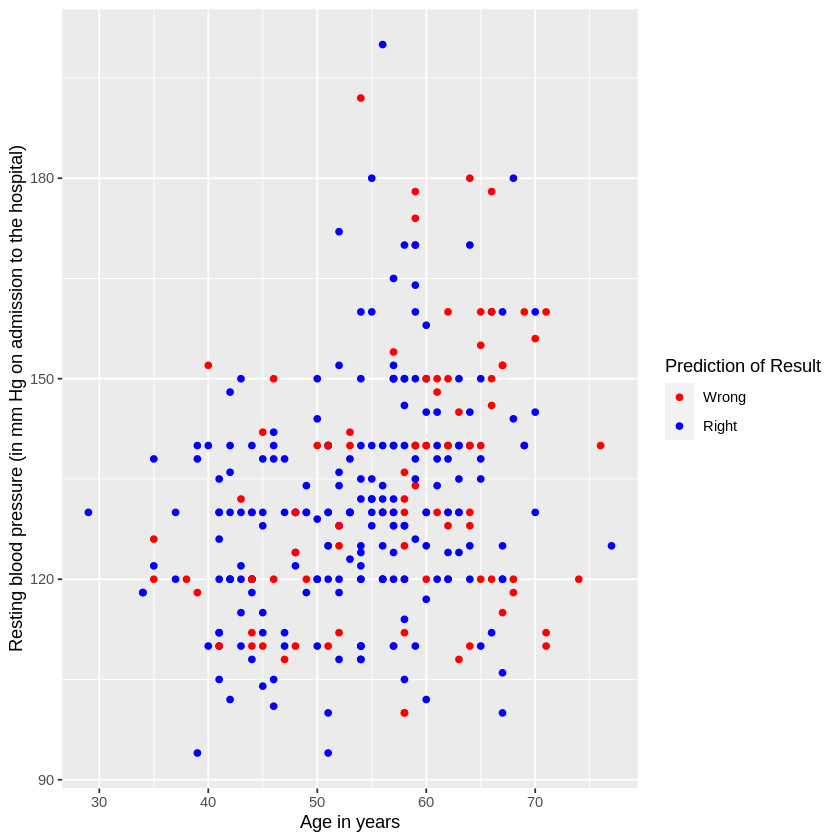

In [24]:
accuracy_rbp_plot <- ggplot(hd_accuracy, aes(x = age, y = trestbps, group = accurate, color = accurate)) +
                  geom_point() +
                  labs(x = "Age in years", y = "Resting blood pressure (in mm Hg on admission to the hospital)", colour = "Prediction of Result") +
                  scale_color_manual(labels = c("TRUE" = "Right", "FALSE" = "Wrong"), values = c("Red", "Blue"))
accuracy_rbp_plot

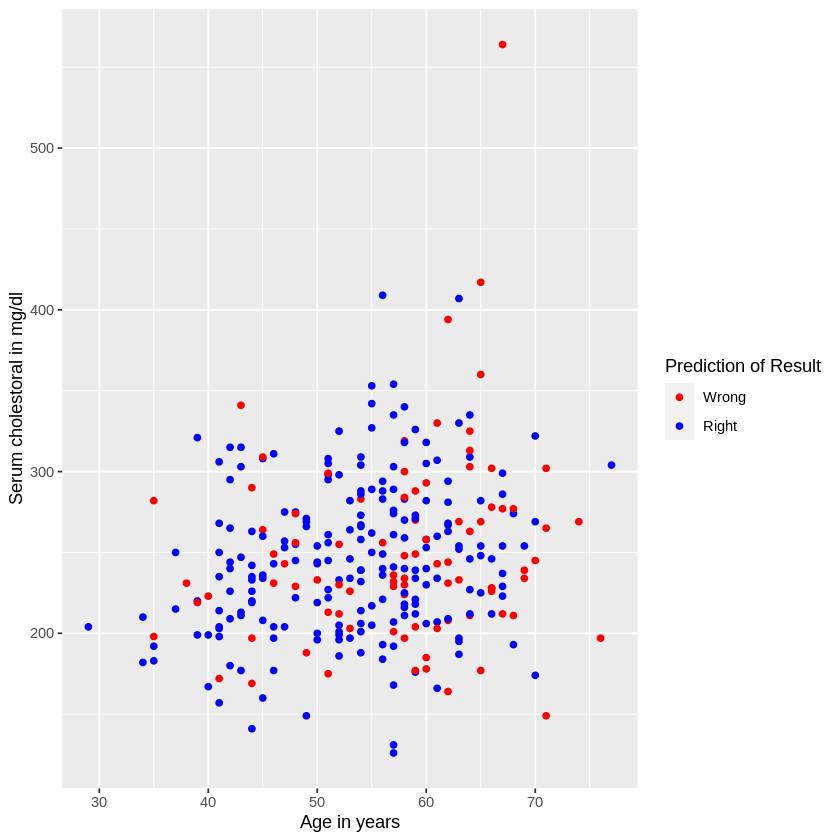

In [25]:
accuracy_chol_plot <- ggplot(hd_accuracy, aes(x = age, y = chol, group = accurate, color = accurate)) +
                   geom_point() +
                   labs(x = "Age in years", y = "Serum cholestoral in mg/dl", colour = "Prediction of Result") +
                   scale_color_manual(labels = c("TRUE" = "Right", "FALSE" = "Wrong"), values = c("Red", "Blue"))
accuracy_chol_plot

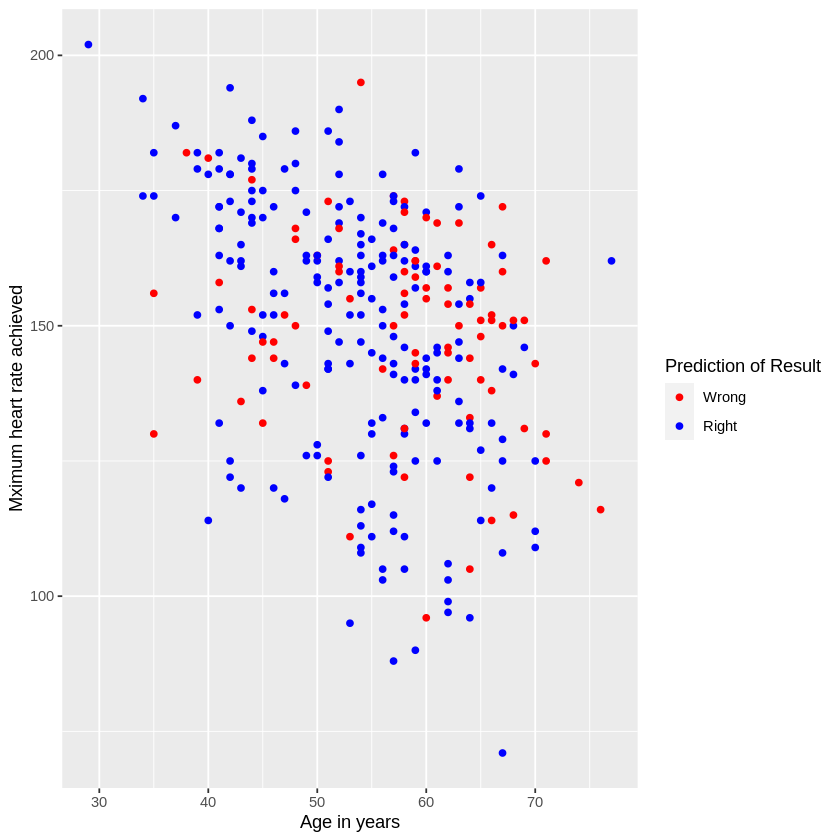

In [26]:
accuracy_mhra_plot <- ggplot(hd_accuracy, aes(x = age, y = thalach, group = accurate, color = accurate)) +
                   geom_point() +
                   labs(x = "Age in years", y = "Mximum heart rate achieved", colour = "Prediction of Result") +
                   scale_color_manual(labels = c("TRUE" = "Right", "FALSE" = "Wrong"), values = c("Red", "Blue"))
accuracy_mhra_plot

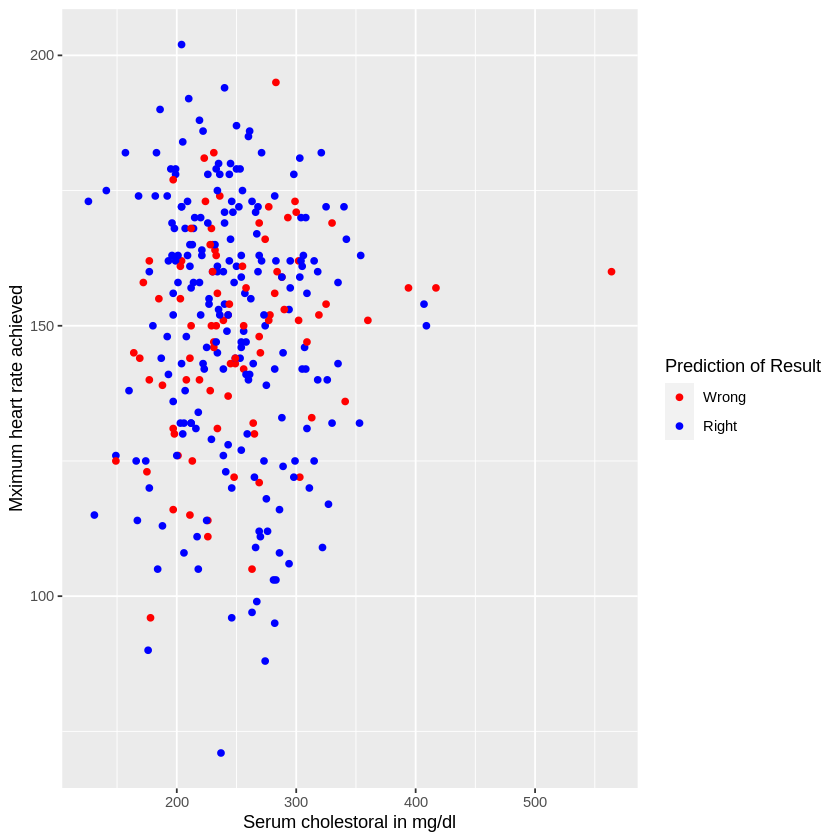

In [27]:
accuracy_s_m_plot <- ggplot(hd_accuracy, aes(x = chol, y = thalach, group = accurate, color = accurate)) +
                  geom_point() +
                  labs(x = "Serum cholestoral in mg/dl", y = "Mximum heart rate achieved", colour = "Prediction of Result") +
                  scale_color_manual(labels = c("TRUE" = "Right", "FALSE" = "Wrong"), values = c("Red", "Blue"))
accuracy_s_m_plot

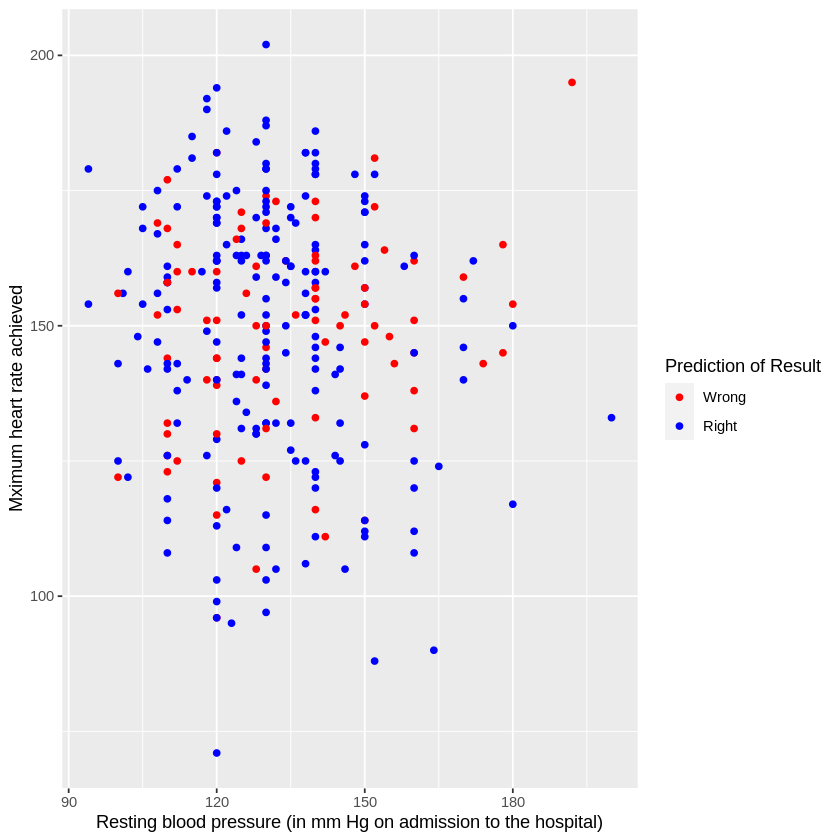

In [28]:
accuracy_r_m_plot <- ggplot(hd_accuracy, aes(x = trestbps, y = thalach, group = accurate, color = accurate)) +
                  geom_point() +
                  labs(x ="Resting blood pressure (in mm Hg on admission to the hospital)", y = "Mximum heart rate achieved", colour = "Prediction of Result") +
                  scale_color_manual(labels = c("TRUE" = "Right", "FALSE" = "Wrong"), values = c("Red", "Blue"))
accuracy_r_m_plot

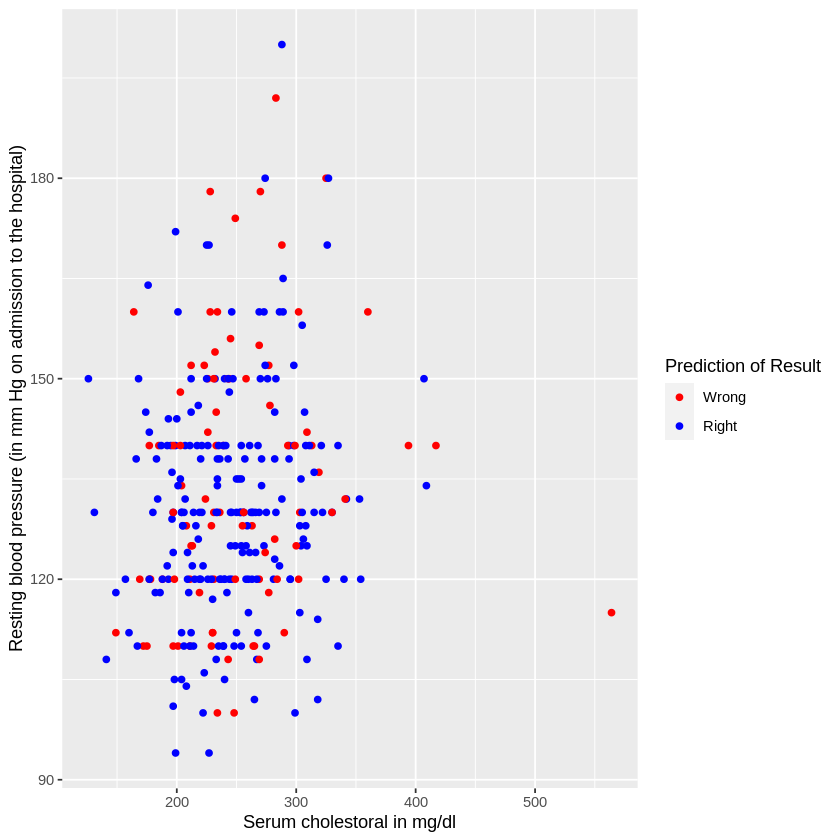

In [29]:
accuracy_s_r_plot <- ggplot(hd_accuracy, aes(x = chol, y = trestbps, group = accurate, color = accurate)) +
                  geom_point() +
                  labs(x = "Serum cholestoral in mg/dl", y = "Resting blood pressure (in mm Hg on admission to the hospital)", colour = "Prediction of Result") +
                  scale_color_manual(labels = c("TRUE" = "Right", "FALSE" = "Wrong"), values = c("Red", "Blue"))
accuracy_s_r_plot

To conclude our analysis, we created visualizations to depict the observations of our original data frame, and colored them according to whether they were correctly or incorrectly predicted by our model. This allows us to have a visual representation of our model’s accuracy, and to understand approximately which ranges of each variable our model had the most difficulty predicting in. 

### Discussion

As seen from the results, when using the predictors age, sex, resting blood pressure, cholesterol level, and maximum heart rate, we found the most optimal K neighbors value to be 25, which produces a final classification model with an average accuracy of 66.67%. This is a reasonable accuracy metric and is expected as all of the predictors are factors and symptoms associated with cardiovascular disease, which has been revealed in the literature referenced in this text. For instance, as individuals age, they experience increasing oxidative stress, which is associated with risk factors of heart diseases such as obesity, diabetes, and frailty (Rodgers, 2019). The consequences of these risk factors are higher resting blood pressure, higher cholesterol levels, and higher maximum heart rate, all of which are associated with cardiovascular disease (Fuchs, 2020; Clark, 1986; Saxena, 2013).

Nevertheless, even with all of the chosen predictors, the model is not considerably accurate, and there are both biological and analysis reasons that contribute to this. Firstly, individuals experience different genetic predispositions, leading some individuals to be at greater risk of cardiovascular disease than others. Individuals can also develop conditions throughout their lifetime which increase their risk of cardiovascular disease. These biological differences and variabilities are difficult to be quantified and taken into account in a data analysis of this caliber. Additionally, the listed predictors that were used above are not the sole risk factors associated with heart disease, meaning that the model does not have all the necessary information needed to make the most accurate prediction. 

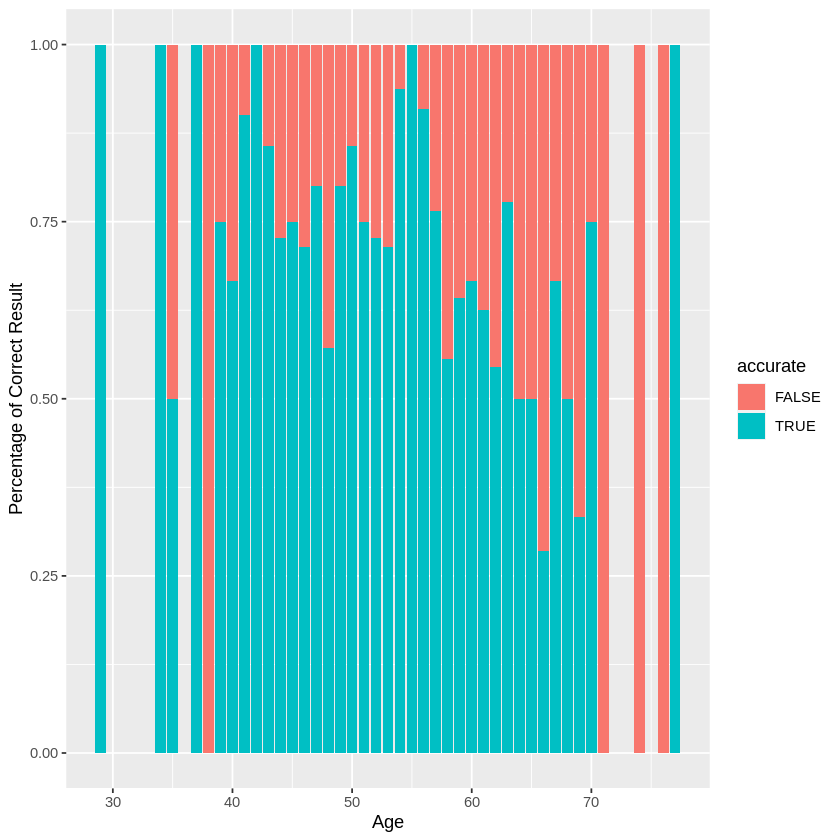

In [30]:
perc_plot <- hd_accuracy |>
          ggplot(aes(x = age)) +
          geom_bar(aes(fill = accurate), position = "fill") +
          labs(x = "Age", y = "Percentage of Correct Result")

perc_plot

We could improve our model in various ways. First, we could use a larger data set, which would allocate more data points to our training set and thus potentially improve the quality of our model as it would be trained with a greater number of observations. Also, we observed from our scatterplots which visualize the correct and incorrect predictions, that our model became less accurate at older ages, which is especially visible in our second scatterplot. Having noticed this pattern, we decided to visualize the distribution of correct and incorrect predictions for different ages using a bar graph. Notably, from the bar graph we can see that our model’s accuracy in predicting heart disease declined as age increased, and it was particularly poor between the ages of 55 to 75. We also note that some of the bars in our visualization only displayed a red fill, which indicates incorrect prediction. It is important to note that this could be because there may have been only one data point for this age, and it was wrongly predicted. Noticing these patterns, it would be beneficial to create a scatter plot with a colored background to help visualize our model’s efficacy. This would show us if the model is underfit or overfit in any particular region of the data, and allow us to adjust our K neighbors value to improve our model’s predictive ability, as the K value we chose could contribute to our model’s accuracy metric. However, we are unfortunately unable to run the code for this kind of plot, which limits this paper as it impedes us from potentially improving our model. Other limitations present in this analysis include the fact that since the model uses multiple predictors, it is not possible to visualize the entire model in one single visualization as it is multi-dimensional. Hence, our model has to be split up into multiple plots, each showing different predictor variables, which do not paint a complete picture of our model’s abilities and accuracy. 

Some significant implications come with these findings. The results showed that even with limited data, it is possible to create a classification model with reasonable accuracy, and considering the previously stated improvements, a better model could be trained and used by medical practitioners to make preliminary diagnoses. For instance, when making a diagnosis on whether an individual has a disease or not, physicians could use classification models before examining the patient directly, or patients could use the model themselves prior to coming in for a physical assessment. The assisted-decision making process allows medical professionals and patients to make more informed choices, which in turn permits the patients to receive the treatment that they need. The results from this model could lead to future inquiries about models for predicting other diseases and conditions, and lead to questions about advancing AI generated and digital health assessments. 

Another usage of such classification models is disease prevention. When a presently non-affected individual has a health appointment, the model could be used to consider their current physiological conditions such as blood pressure, cholesterol levels and more, and predict whether they may be at risk of contracting this condition in the future. Hence, preventative measures could be taken, such as implementing healthier dietary habits and regularly exercising, to minimize their susceptibility to heart disease. 

### References

Rodgers, J. L., Jones, J., Bolleddu, S. I., Vanthenapalli, S., Rodgers, L. E., Shah, K., Karia, K., & Panguluri, S. K. (2019). Cardiovascular Risks Associated with Gender and Aging. Journal of cardiovascular development and disease, 6(2), 19. https://doi.org/10.3390/jcdd6020019

Fuchs, F. D., & Whelton, P. K. (2020). High Blood Pressure and Cardiovascular Disease. Hypertension (Dallas, Tex. : 1979), 75(2), 285–292. https://doi.org/10.1161/HYPERTENSIONAHA.119.14240

Clark L. T. (1986). Cholesterol and heart disease: current concepts in pathogenesis and treatment. Journal of the National Medical Association, 78(8), 743–751.

Saxena, A., Minton, D., Lee, D. C., Sui, X., Fayad, R., Lavie, C. J., & Blair, S. N. (2013). Protective role of resting heart rate on all-cause and cardiovascular disease mortality. Mayo Clinic proceedings, 88(12), 1420–1426. https://doi.org/10.1016/j.mayocp.2013.09.011

Mosca, L., Barrett-Connor, E., & Wenger, N. K. (2011). Sex/gender differences in cardiovascular disease prevention: what a difference a decade makes. Circulation, 124(19), 2145–2154. https://doi.org/10.1161/CIRCULATIONAHA.110.968792